# Dirichlet Distribution

A two dimensional categorical distribution can be written as:
\begin{align*}p(x|\theta) &= \begin{cases} 
      \theta_1 & x = 1 \\
      \theta_2 & x = 2 \\
   \end{cases}\\
    &= \begin{cases} 
      \theta_1 & x = 1 \\
      1 - \theta_1 & x = 2 \\
   \end{cases}
 \end{align*}
This can also be written in the following form, which makes it more amenable to mathematical manipulation.
\begin{align*}p(x|\theta) &= \prod_{i=1}^{k} \theta_i^{x_i}
 \end{align*}
Where, for the categorical case, exactly one element of the k-dimensional vector will be 1 and the rest will be zero. Similar notation can also be used to describe the multinomial (see ref).

 
https://en.wikipedia.org/wiki/Categorical_distribution

The above form also makes the connection to the Dirichlet distribution clearer

\begin{align*}p(\theta|\alpha) &= \frac{1}{B(\alpha)}\prod_{i=0}^{k-1}  \theta_i^{\alpha_i-1}
 \end{align*}
 
### Dirichlet Multiplication
\begin{align*}p(\theta|\alpha_1)p(\theta|\alpha_2) &= 
\frac{1}{B(\alpha_1)}\prod_{i=0}^{k-1}  \theta_i^{\alpha_{1,i}-1}
\frac{1}{B(\alpha_2)}\prod_{i=0}^{k-1}  \theta_i^{\alpha_{2,i}-1}\\
 &= \frac{1}{B(\alpha_1)}\frac{1}{B(\alpha_2)}\prod_{i=0}^{k-1}  \theta_i^{\alpha_{1,i}-1}  \theta_i^{\alpha_{2,i}-1}\\
 &= \frac{1}{B(\alpha_1)}\frac{1}{B(\alpha_2)}\prod_{i=0}^{k-1}  \theta_i^{\alpha_{1,i}-1 + \alpha_{2,i}-1}\\
 &= \frac{1}{B(\alpha_1)B(\alpha_2)}\prod_{i=0}^{k-1}  \theta_i^{\alpha_i-1} \quad  \text{with } a_i = {\alpha_{1,i}-1 + \alpha_{2,i}}\\
 &= \left(\frac{B(\alpha)}{B(\alpha_1)B(\alpha_2)}\right)\frac{1}{B(\alpha)}\prod_{i=0}^{k-1}  \theta_i^{\alpha_i-1} \quad  \text{with } a_i = {\alpha_{1,i}-1 + \alpha_{2,i}}\\
 \end{align*}

## Polya
The joint distribution, known as a Dirichlet-multinomial, or Polya distribution:

\begin{align*}p(x,\theta|\alpha) &= p(x|\theta)p(\theta|\alpha)\\
&= \prod_{i=0}^{k-1} \theta_i^{x_i}\frac{1}{B(\alpha)}\prod_{i=1}^{k}  \theta_i^{\alpha_i-1}\\
&= \frac{1}{B(\alpha)}\prod_{i=1}^{k} \theta_i^{x_i}\prod_{i=1}^{k}  \theta_i^{\alpha_i-1}\\
&= \frac{1}{B(\alpha)}\prod_{i=1}^{k} \theta_i^{x_i}\theta_i^{\alpha_i-1}\\
&= \frac{1}{B(\alpha)}\prod_{i=1}^{k} \theta_i^{\alpha_i+x_i-1}
 \end{align*}

The posterior is:
\begin{align*}p(\theta|x=\mathbf{x_i},\alpha) &= \frac{p(x=\mathbf{x_i},\theta|\alpha)}{p(x=\mathbf{x_i})}\\
&= \frac{1}{p(x=\mathbf{x_i})B(\alpha)}\prod_{i=1}^{k} \theta_i^{\alpha_i+x_i-1}
 \end{align*}


So observing $x_i$ (drawing a sample with value $x_i$) has the effect of adding 1 to the corresponding alpha value(?)

Marginalising out the x parameters, we just get the dirichlet marginal (OBVIOUSLY):
\begin{align*}p(\theta|\alpha) &= \int p(x,\theta|\alpha)dx\\
                          &= \int \frac{1}{B(\alpha)}\prod_{i=1}^{k} \theta_i^{\alpha_i+x_i-1} dx\\
                          &= \frac{1}{B(\alpha)} \int \prod_{i=1}^{k} \theta_i^{\alpha_i - 1} \theta_i^{x_i} dx\\
                          &= \frac{1}{B(\alpha)} \prod_{i=1}^{k} \theta_i^{\alpha_i - 1} \int \prod_{i=1}^{k} \theta_i^{x_i} dx\\
\end{align*}

Marginalising out the $\theta$ parameters, is more interesting:


\begin{align*}p(x|\alpha) &= \int p(x,\theta|\alpha)d\theta\\
                          &=  \frac{1}{B(\alpha)} \int \prod_{i=1}^{k} \theta_i^{\alpha_i+x_i-1} dx\\
                          &=\frac{\Gamma(\sum_i \alpha_i)}{\Gamma(\sum_i \alpha_i + \sum_i x_i)}\prod_{i=1}^{k}\frac{\Gamma(\alpha_i + x_i)}{\Gamma(\alpha_i)}
\end{align*}

we want the term in the product to be in the form $\theta^{x_i}$. We can see that $\frac{\Gamma(\alpha_i + x_i)}{\Gamma(\alpha_i)} = 1$ if $x_i = 0$. Using the $\gamma(z+1) = z\gamma(z)$ identity, we can see that $\frac{\Gamma(\alpha_i + x_i)}{\Gamma(\alpha_i)} = \alpha_i$ if $x_i = 1$. Therefore, the above expression is equal to:

\begin{align*}p(x|\alpha) &=\frac{\Gamma(\sum_i \alpha_i)}{\Gamma(\sum_i \alpha_i + \sum_i x_i)}\prod_{i=1}^{k}\alpha_i^{x_i}\\
 &=\frac{\Gamma(\sum_i \alpha_i)}{\Gamma(\sum_i \alpha_i + d)}\prod_{i=1}^{k}\alpha_i^{x_i}
\end{align*}
where $d$ is the dimensionality (the dimension of the space in which the simplex lives)

references:
* https://math.stackexchange.com/questions/709959/how-to-derive-the-dirichlet-multinomial
* https://mimno.infosci.cornell.edu/info6150/exercises/polya.pdf (page 2)


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from veroku.factors._factor import Factor
from veroku.factors._factor_utils import beta_func
from scipy.spatial.transform import Rotation
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from veroku.factors.dirichlet import Dirichlet
from veroku.factors.categorical import Categorical
from veroku.factors.gaussian import Gaussian
from veroku.factors.polya import Polya

from scipy import integrate
from scipy.special import gamma, beta
import copy

# Polya

In [8]:
n = 1
alphas = np.array([1, 0.3, 0.5])
def dir_mult(x, alphas):
    norm = gamma(np.sum(alphas))*gamma(n+1)/(gamma(n+np.sum(alphas)))
    prod = norm
    for xk,ak in zip(x.ravel(), alphas.ravel()):
        prod *= gamma(xk+ak)/(gamma(ak)*gamma(xk+1))
    return prod

integral = 0
for x_index in range(len(alphas)):
    x = np.zeros(len(alphas))
    x[x_index] = 1
    e = dir_mult(x, alphas)
    integral += e
integral

1.0

In [9]:
alphas = np.array([1, 1, 2])
beta_sum = 0
for z_index in range(len(alphas)):
    zi = np.zeros(len(alphas))
    zi[z_index] = 1
    beta_sum += beta_func(alphas + zi)
    print(beta_sum)
beta_sum

0.041666666666666664
0.08333333333333333
0.16666666666666666


0.16666666666666666

### Parameter Learning

In [10]:
#    
#true_probs = [0.1,0.7, 0.2]
#probs_table={(i,):p for i,p in enumerate(true_probs)}
#categorical = Categorical(var_names=["data"], cardinalities=[len(true_probs)], probs_table=probs_table)
#prior = Dirichlet(np.array([1, 1, 1]), var_names=['alpha_0', 'alpha_1', 'alpha_2'])
#alphas = np.array([0, 0, 0]) # THIS IS WRONG
#polya = Polya(alphas)
#
#data_sample = categorical.sample(1).astype(int)[0]
#dirichlet_update = polya.reduce(vrs=["data"], values=data_sample)
#print("self.prior = ", dirichlet_update)
#print("dirichlet_update = ", dirichlet_update)
#prior = prior.absorb(dirichlet_update)
#fig,ax = plt.subplots( figsize=[5,5])
#prior.plot(ax=ax)
#

/home/ej/personal_projects/veroku/veroku/factors/dirichlet.py:118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


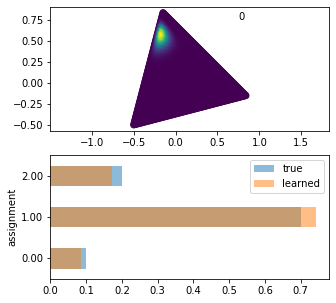

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

fig,axs = plt.subplots(2,1, figsize=[5,5]);

class DirichletUpdateAnimater():
    def __init__(self, prior, true_categorical):
        self.prior = prior
        self.true_categorical = true_categorical
        self.a_var_names=['alpha_0', 'alpha_1', 'alpha_2'] 
        self.p_var_names=['data'] 
        self.data_sample_sum = np.zeros(3)

    def __call__(self, i):

        ax = axs[0]   
        ax.clear()
        alphas = np.array([1, 1, 1]) # this is uniform
        polya = Polya(alphas, 
                      p_var_names=self.p_var_names,
                      a_var_names=self.a_var_names)
        prior_absorbed_polya = polya.absorb(self.prior)
        
        data_sample = self.true_categorical.sample(1).astype(int)[0]
        
        self.data_sample_sum[data_sample[0]] +=1 
        dirichlet_update = polya.reduce(vrs=["data"], values=data_sample)
        updated_polya = prior_absorbed_polya.absorb(dirichlet_update)
        self.prior = updated_polya.marginalize(vrs=self.a_var_names)

        plot = self.prior.plot(ax=ax);
        s = ax.text(x=0.75, y=0.75, s=str(i))
        
        ax = axs[1]
        ax.clear()
        expected_categorical = updated_polya.marginalize(vrs=self.p_var_names)
        self.true_categorical.plot(label="true", ax=ax)
        cat_plot = expected_categorical.plot(color_index=1, label="learned", ax=ax);
    
true_probs = [0.1,0.7, 0.2]
probs_table={(i,):p for i,p in enumerate(true_probs)}
categorical = Categorical(var_names=["data"], cardinalities=[len(true_probs)], probs_table=probs_table)
prior = Dirichlet(np.array([1, 1, 1]), var_names=['alpha_0', 'alpha_1', 'alpha_2'])

animater = DirichletUpdateAnimater(prior, true_categorical=categorical)
if 1:
    ani = FuncAnimation(fig, animater, interval=1, blit=False, repeat=True, frames=30);
    gif_file_name = "categorical_parameter_learning.gif"
    ani.save(gif_file_name, dpi=600, writer=PillowWriter(fps=1));
else:
    animater(0)

In [19]:
from IPython.display import Image
Image(url=gif_file_name, height=2, width=300)

processed_assignment_value_names =  ['0.00']
processed_assignment_value_names =  ['1.00']
processed_assignment_value_names =  ['2.00']


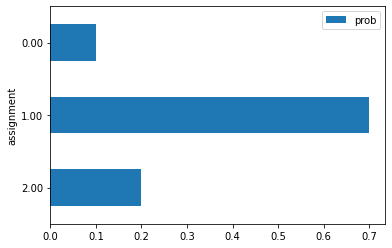

In [12]:
categorical.plot()

## Int test

In [14]:
alphas = np.array([1, 2, 3])
polya = Polya(alphas)
#np.sample(10).T
cat = polya.marginalize(['data'])
actual_integral = np.exp(scipy.special.logsumexp(cat.log_probs_tensor))
assert np.isclose(actual_integral, 1.0)
#polya.marginalize(['alpha_0', 'alpha_1', 'alpha_2'])

# Dirichlet

1.0

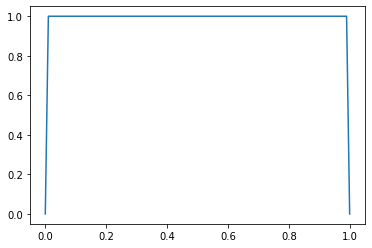

In [25]:

dirichlet = Dirichlet([1.0,1.0])
dirichlet.plot()

definite_integral, _ = integrate.quad(dirichlet.potential, 0.0, 1.0)
definite_integral

1.0

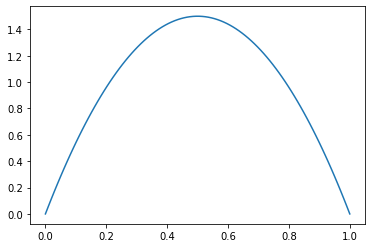

In [16]:

dirichlet = Dirichlet([2.0,2.0])
dirichlet.plot()

definite_integral, _ = integrate.quad(dirichlet.potential, 0.0, 1.0)
definite_integral

In [17]:
dirichlet

Dirichlet Factor
alphas: [2. 2.]
weight: 1.000

<Figure size 432x288 with 0 Axes>

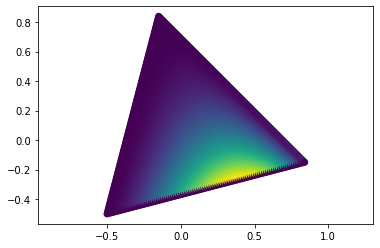

<Figure size 432x288 with 0 Axes>

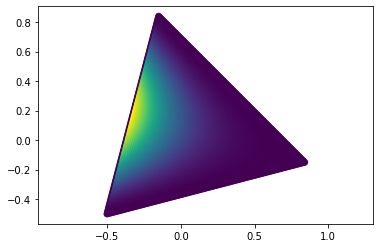

<Figure size 432x288 with 0 Axes>

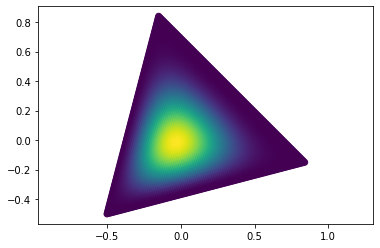

<Figure size 432x288 with 0 Axes>

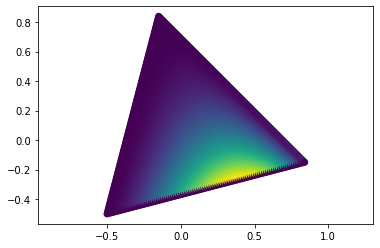

In [18]:

dirichlet_a = Dirichlet([3, 1.0, 2.0])
dirichlet_a.plot()
dirichlet_b = Dirichlet([1, 3.0, 3.0])
dirichlet_b.plot()
dirichlet = dirichlet_a.absorb(dirichlet_b)
dirichlet.plot()
dirichlet_ar = dirichlet.cancel(dirichlet_b)
dirichlet_ar.plot()

/home/ej/anaconda3/envs/veroku/lib/python3.8/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0.9999998881329124

<Figure size 432x288 with 0 Axes>

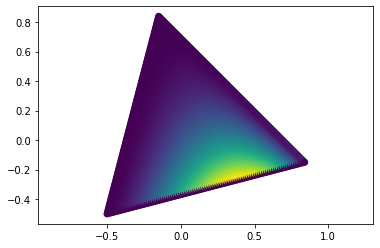

In [20]:

dirichlet_a = Dirichlet([3, 1.0, 2.0])
dirichlet_b = Dirichlet([1, 3.0, 3.0])
dirichlet = dirichlet_a#.absorb(dirichlet_b)

dirichlet.plot()
definite_integral, _ = integrate.dblquad(func=lambda x1, x2: dirichlet.potential(np.array([[x1, x2]]).T), 
                                         a=0.0,
                                         b=1.0,
                                         gfun=lambda x: 0.0,
                                         hfun=lambda x: 1.0)
definite_integral

In [ ]:
dirichlet_a.kl_divergence(dirichlet_b)

<br><br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br>
# Graveyard

Marginalising out the theta parameters, we can get the categorical marginal:
\begin{align*}p(x|\alpha) &= \int p(x,\theta|\alpha)d\theta\\
&=\frac{\Gamma(\alpha_0)\Gamma(n+1)}{\Gamma(n+\alpha_0)}\prod_{i=1}^{k}\frac{\Gamma(x_i + \alpha_k)}{\Gamma(\alpha_k)\Gamma(x_i + 1)}
\end{align*}

where $\alpha_0 = \sum\alpha_i$

We want to write this in the standard form:

\begin{align*}p(x|\theta) &= \prod_{i=1}^{k} \theta_i^{x_i}
 \end{align*}


In [ ]:
r_ = np.array([-1,1,0])
r = r_/np.linalg.norm(r_)

R = Rotation.from_rotvec(r*np.radians(45)).as_matrix()
v = np.array([0,0,0]).T
v = np.array([1,0,0]).T
s = R@v + np.array([0,0,1]).T
s

In [ ]:
#s_vecs_array.shape

In [ ]:
#ax.scatter(*s_vecs_array)
#ax.scatter(*s_vecs_array[:2,:])
#ax.grid()

In [ ]:
#fig, ax = plt.subplots()
#s_vecs_array = np.hstack(s_vecs)
#ax.scatter(*s_vecs_array[:2,:])
##ax.grid()
#ax.axis("equal")